<a href="https://colab.research.google.com/github/Ishan1923/Skin-Cancer-Detection-using-DL-techniques/blob/main/SkinCancerDetectionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin Care Detection using Deep Learning Techniques

## **importing** libraries

In [141]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pylab as plt
import os

## Reading in **Images**

In [142]:
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", dataset_path)

# Construct full path to melanoma test images
melanoma_folder = os.path.join(dataset_path, "Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma")

# Get list of image paths
imgs = glob.glob(os.path.join(melanoma_folder, "*.jpg"))

print(f"Found {len(imgs)} images")

Path to dataset files: /kaggle/input/skin-cancer9-classesisic
Found 16 images


In [143]:
#for plotting images
def plot_images(images_list, rows = 4, cols = 4, x = 15, y = 15):
  fig, ax = plt.subplots(rows, cols, figsize = (x, y))
  ax = ax.flatten()
  for i in range(len(images_list)):
    image = cv2.imread(imgs[i])
    if image is not None:
      ax[i].imshow(image)
      ax[i].set_title(f"image {i + 1}")
  plt.show()

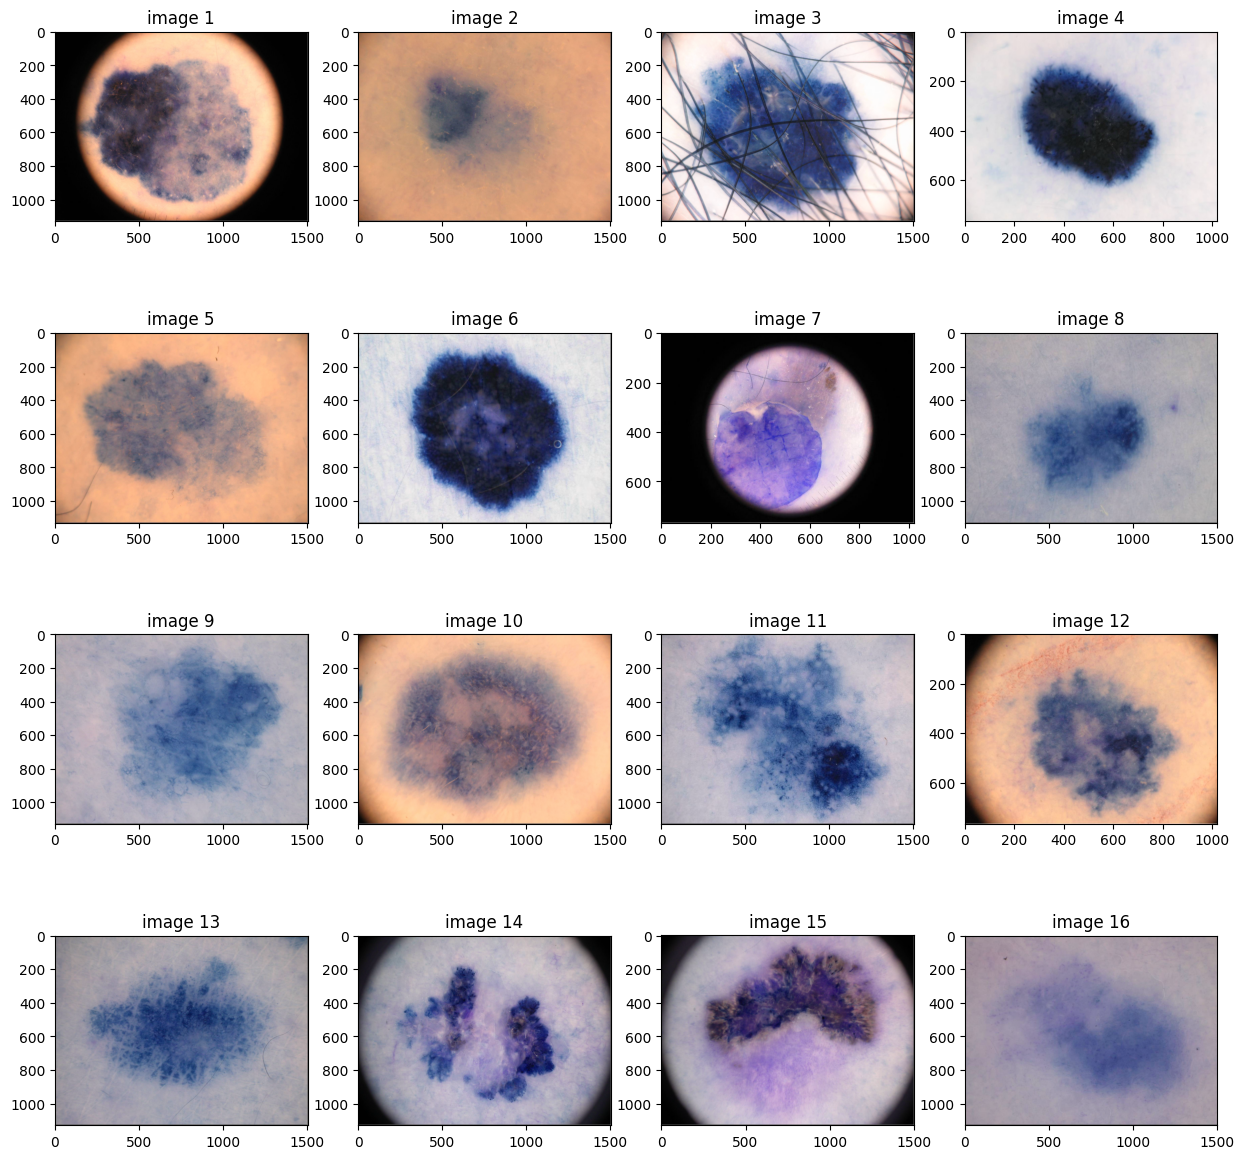

In [144]:
plot_images(imgs)

## **Resizing** Images

In [145]:
#getting the current size of images
org_size = list()
for i in imgs:
  image = cv2.imread(i)
  dim = image.shape
  org_size.append(dim)
org_size

[(1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1503, 3),
 (1129, 1504, 3)]

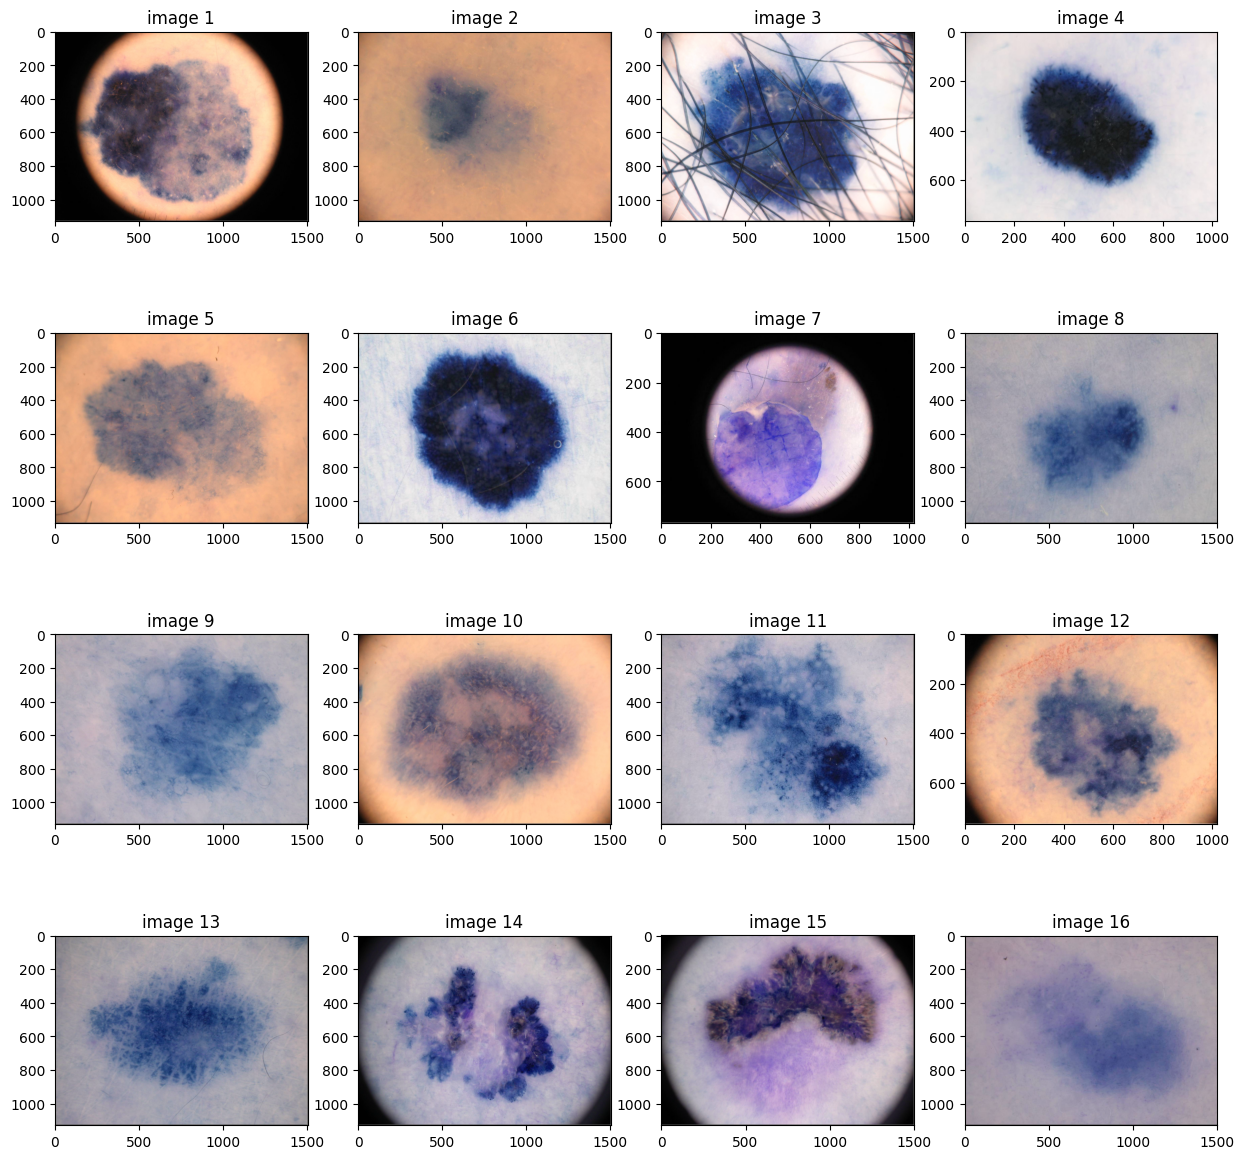

In [146]:
# re-sizing using cv2
resized_images = list()
for i in imgs:
  image = cv2.imread(i)
  if image is None:
    print("can't find the image.")
    continue
  image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
  resized_images.append(image)

#plotting the resized images
plot_images(resized_images)

In [147]:
print(len(org_size))
print(len(resized_images))


16
16


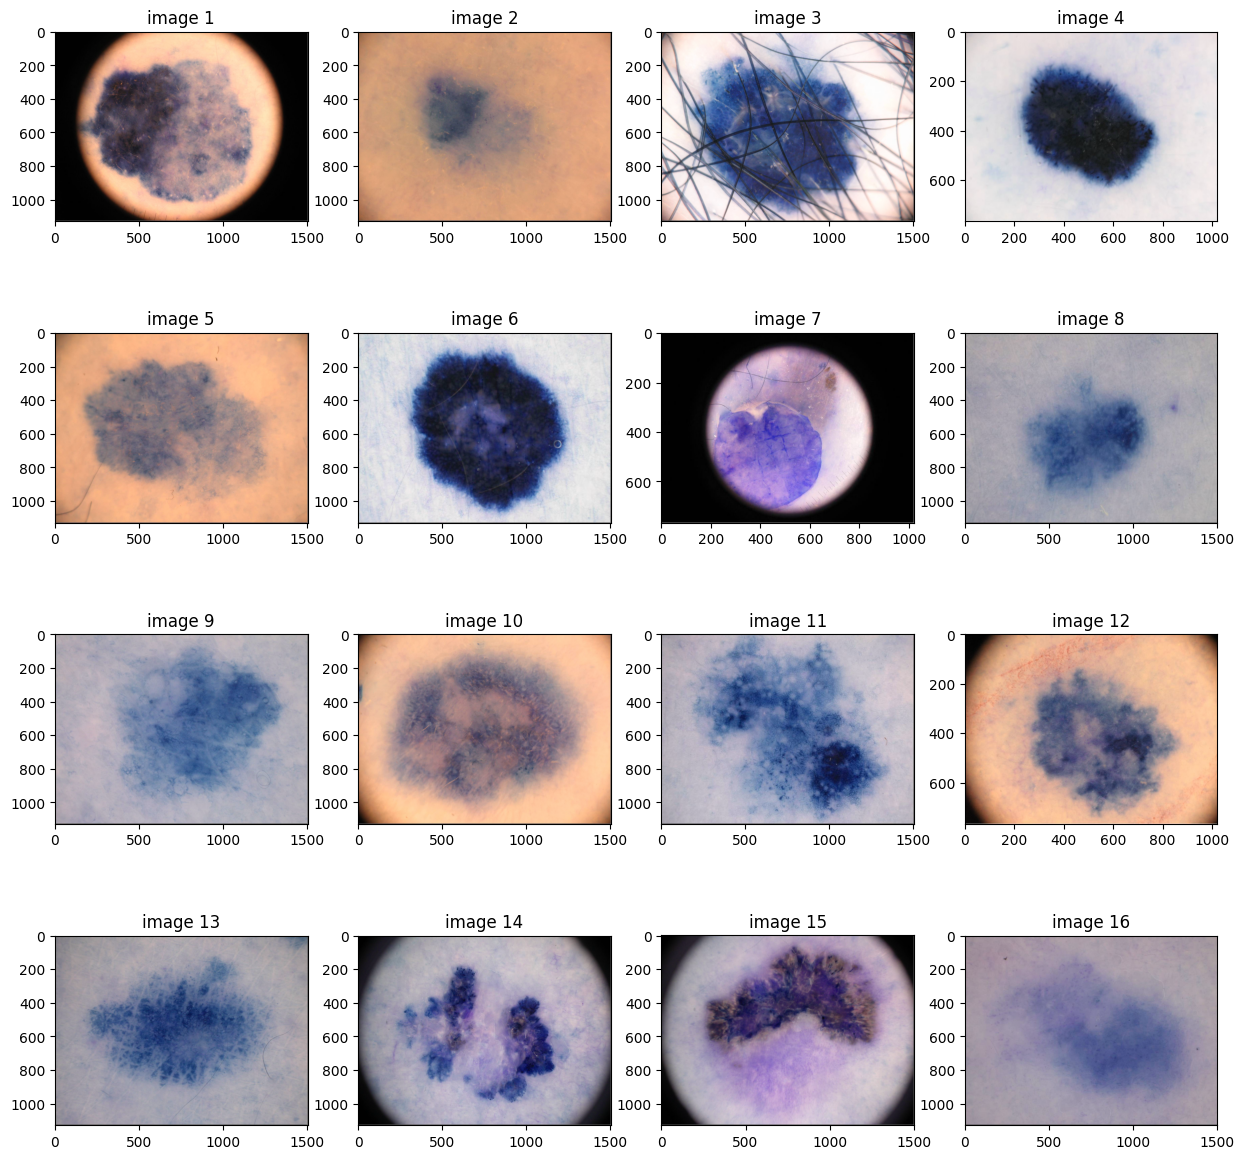

In [148]:
#resize to original sizes the image and store in a list
back2org = list()
for i in range(len(resized_images)):
  image = cv2.resize(resized_images[i], (org_size[i][1], org_size[i][0]))
  back2org.append(image)
plot_images(back2org)


In [149]:
resized_images_dim = list()
for i in resized_images:
  dim = i.shape
  resized_images_dim.append(dim)
resized_images_dim

[(224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3)]

In [150]:
org_size_back = list()
for i in back2org:
  dim = i.shape
  org_size_back.append(dim)
org_size_back

[(1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1503, 3),
 (1129, 1504, 3)]

#### checking information loss on resizing

In [165]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

def quantity_data_loss(original, resized):
  #convert BGR to GRAY for SSIM
  original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

  score_ssim = ssim(original_gray, resized_gray)
  score_mse = mse(original, resized)
  return score_ssim, score_mse

original_imgs = []
for i in imgs:
  image = cv2.imread(i)
  original_imgs.append(image)

ssim_vals = []
mse_vals = []

for i in range(len(original_imgs)):
  s, m = quantity_data_loss(original_imgs[i], back2org[i])
  ssim_vals.append(s)
  mse_vals.append(m)
ssim_vals = np.array(ssim_vals)
mse_vals = np.array(mse_vals)
print(ssim_vals)
print(mse_vals)

[0.93712737 0.96862183 0.90606741 0.98141982 0.96000989 0.93738555
 0.9373666  0.95533807 0.94713357 0.95357736 0.89382857 0.94265986
 0.94124041 0.9338282  0.95290883 0.96753174]
[160.72276253 147.86446908 217.95250045   4.48705447 154.72018324
 204.39759892 208.87777287 159.75692632 166.17668876 162.05649809
 179.64785432  67.66158464 155.42472745 157.84417128 157.10563383
 151.69542121]


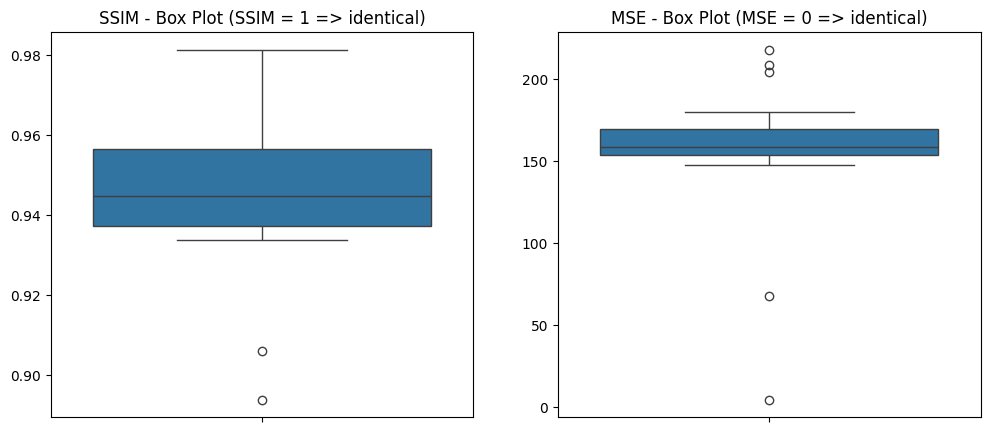

In [166]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(y = ssim_vals)
plt.title('SSIM - Box Plot (SSIM = 1 => identical)')
plt.subplot(1,2,2)
sns.boxplot(y = mse_vals)
plt.title('MSE - Box Plot (MSE = 0 => identical)')
plt.show()

Left diagram:                              <br>
=>median = 0.945 approx.                     <br>
=>most outliers are below 0.91               <br>
=>SSIM values range from about 0.89 to 0.98  <br>
Right diagram: <br>
=>MSE values cluster between ~150 and 180<br>
=>outliers lie for mse < 100 or mse > 200 <br>

This shows, most images are struturally similar and with low pixel error, except only few outliers.

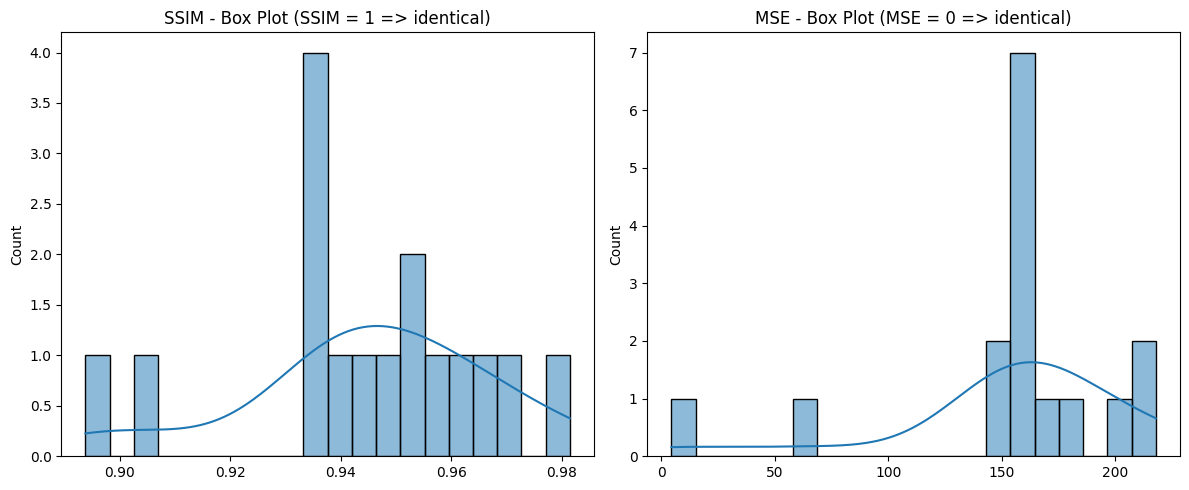

In [170]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(ssim_vals, bins = 20, kde = 1)
plt.title('SSIM - Box Plot (SSIM = 1 => identical)')
plt.subplot(1,2,2)
sns.histplot(mse_vals, bins = 20, kde = 1)
plt.title('MSE - Box Plot (MSE = 0 => identical)')
plt.tight_layout()
plt.show()

## **Normalising** pixel values

## Removing Unnecessary features (Hairs, etc)

In [152]:
img_mpl = plt.imread(imgs[15])
img_cv2 = cv2.imread(imgs[15])
img_mpl.shape, img_cv2.shape

((1129, 1504, 3), (1129, 1504, 3))

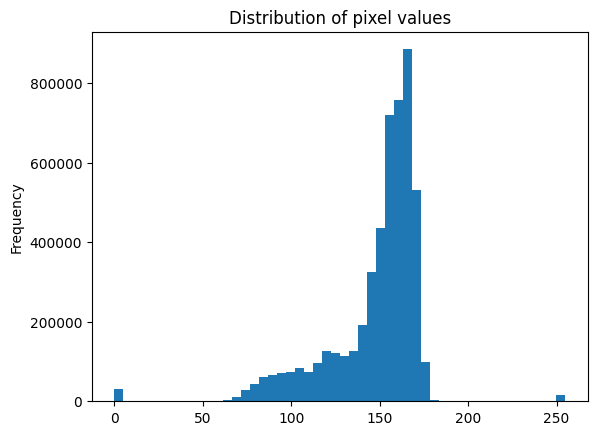

In [153]:
pd.Series(img_mpl.flatten()).plot(kind = 'hist', bins = 50, title = 'Distribution of pixel values')
plt.show()

### Display images


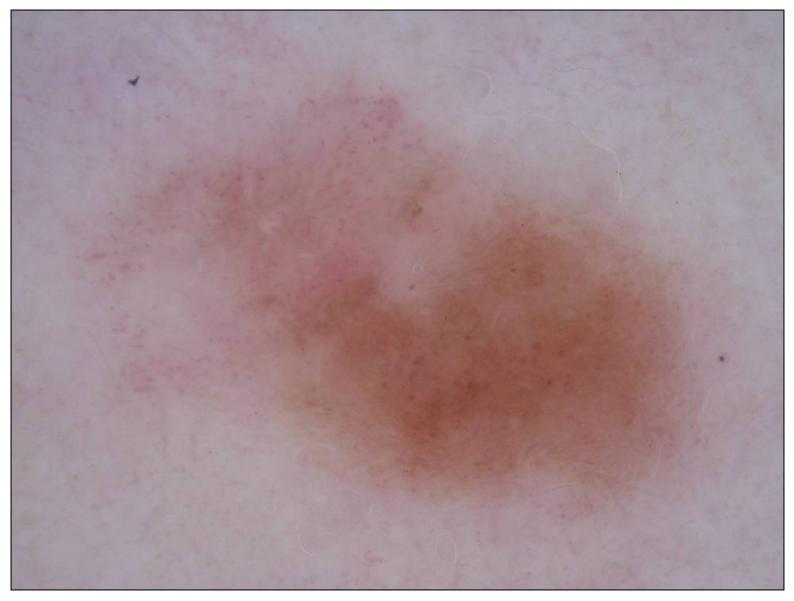

In [154]:
fig, ax = plt.subplots(figsize =(10,10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

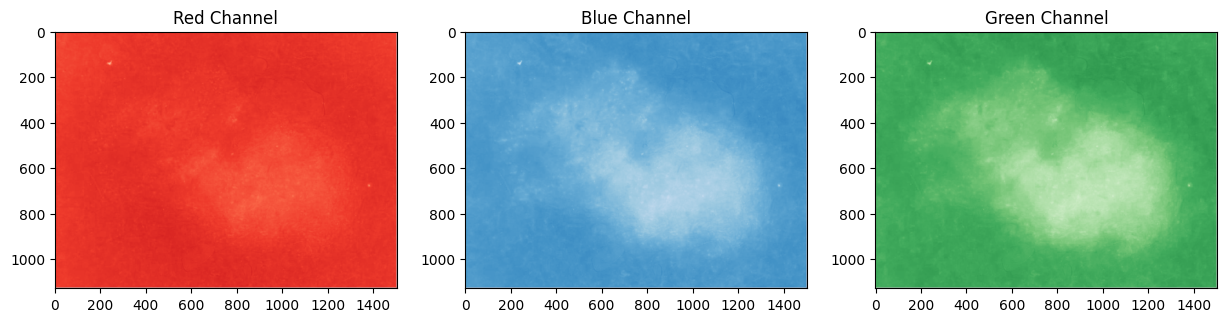

In [155]:
#Display RGB Channels of our image
fig, axe = plt.subplots(1,3, figsize = (15,5))
axe[0].imshow(img_mpl[:,:,0], cmap = 'Reds')
axe[1].imshow(img_mpl[:,:,1], cmap = 'Blues')
axe[2].imshow(img_mpl[:,:,2], cmap = 'Greens')
axe[0].set_title('Red Channel')
axe[1].set_title('Blue Channel')
axe[2].set_title('Green Channel')
plt.show()

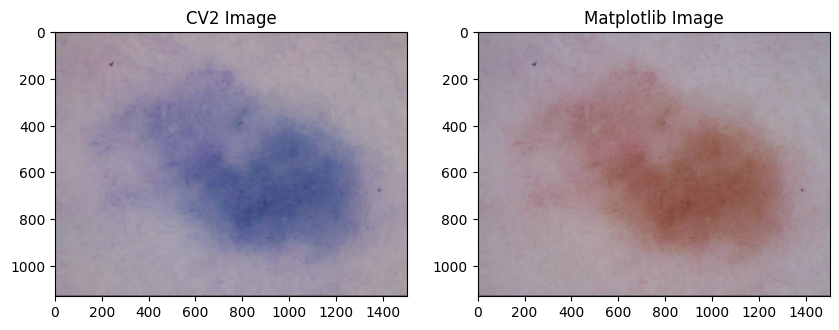

In [156]:
fig, axe = plt.subplots(1,2, figsize = (10, 5))
axe[0].imshow(img_cv2)
axe[1].imshow(img_mpl)
axe[0].set_title('CV2 Image')
axe[1].set_title('Matplotlib Image')
plt.show()

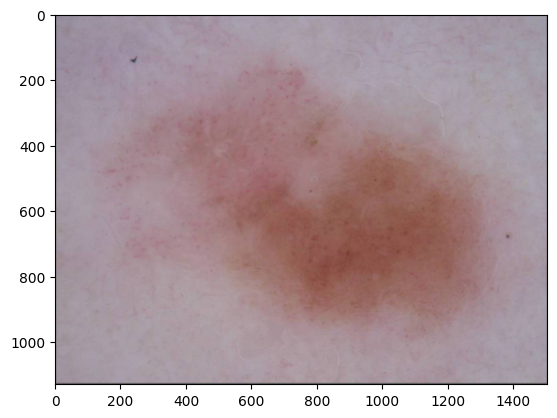

In [157]:
#converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
plt.show()

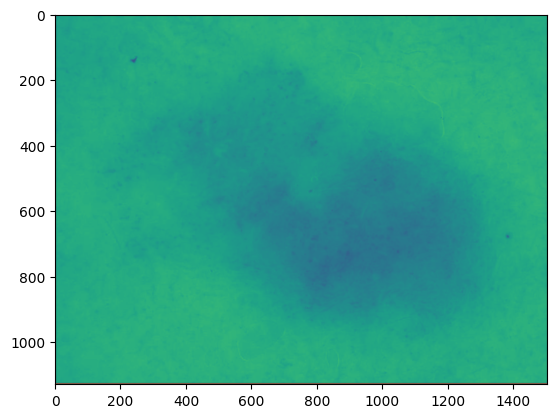

In [158]:
#converting from BGR to Grayscale
img_cv2_gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots()
ax.imshow(img_cv2_gray)
plt.show()

## Image Manipulation

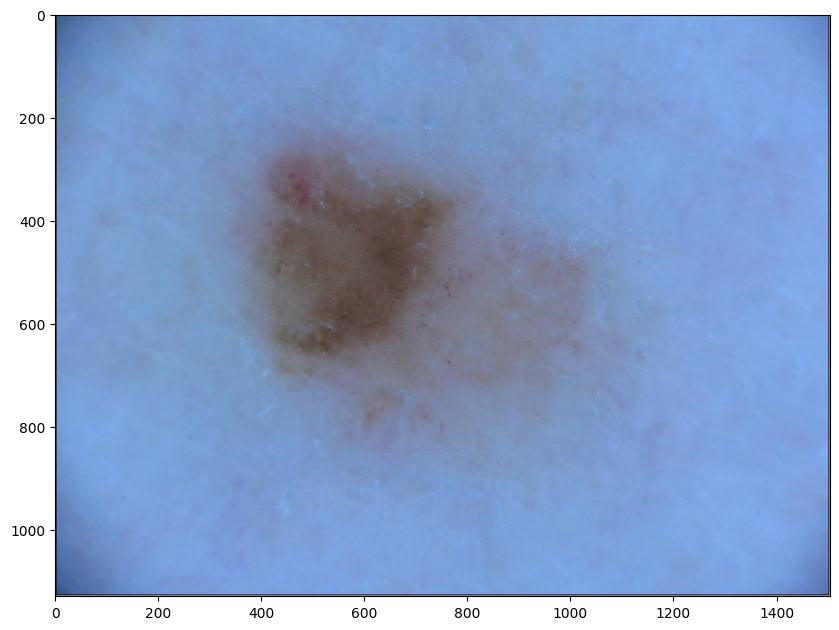

In [159]:
img = plt.imread(imgs[1])
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
ax.axis('on')
plt.show()

### Changing Color Channels

(1129, 1504)


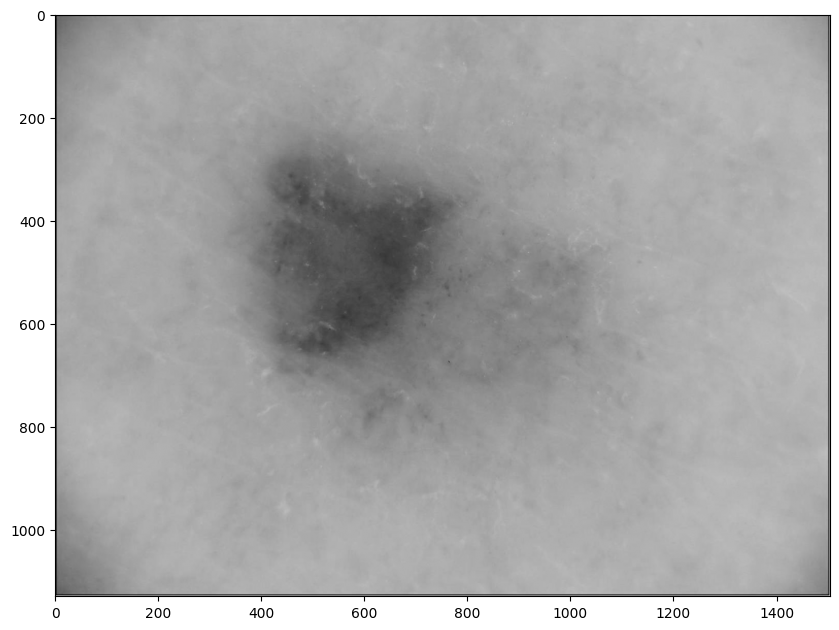

In [160]:
img_bgr_to_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img_bgr_to_gray, cmap = 'gray')
print(img_bgr_to_gray.shape)
plt.show()

### image resizing and scaling

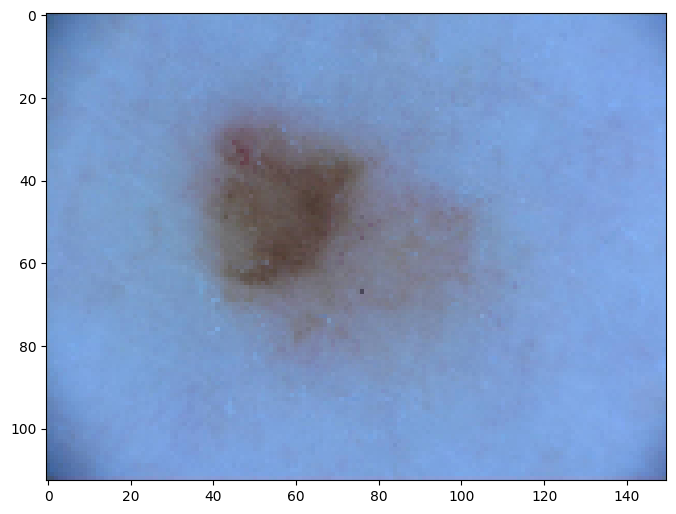

In [161]:
img_resized = cv2.resize(img, None, fx = 0.1, fy = 0.1)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(img_resized)
plt.show()

# CV2 Kernels

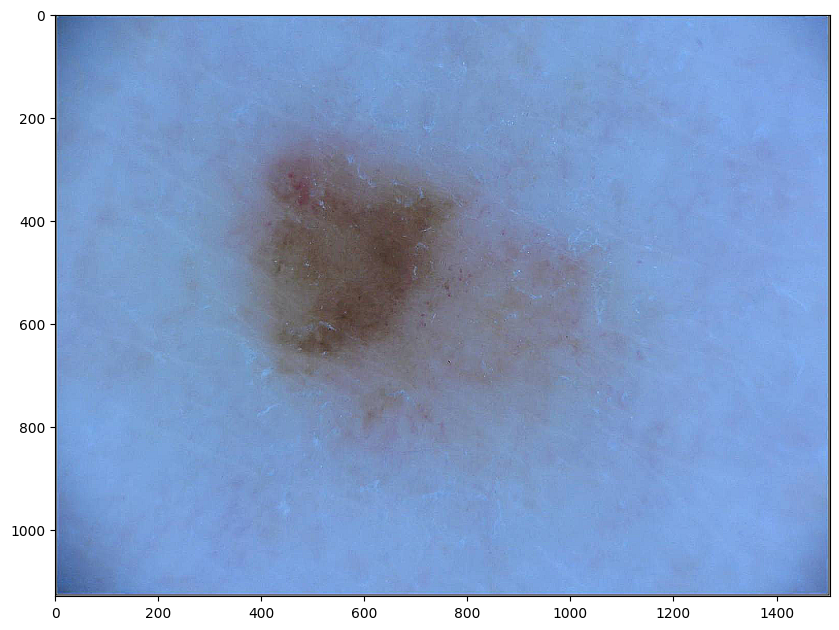

In [162]:
#Sharpen
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1 ,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)


fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(sharpened)